In [4]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [5]:
df1 = pd.read_csv('application_record.csv')
df2 = pd.read_csv('credit_record.csv')

In [6]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
#Let's join both datasets on ID

df = df1.merge(df2, on='ID', how='left')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C


In [9]:
len(df)

1179815

In [10]:
df.dropna()
df = df.mask(df == 'NULL').dropna()

/Users/parthxparab/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
len(df)

537667

In [12]:
def risk(x):
    if x >= -3:
        return 'no'
    elif x < -3:
        return 'yes'
    else:
        return 'null'

df['RISK'] = df['MONTHS_BALANCE'].apply(lambda x: risk(x))

In [13]:
df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,RISK
1176066,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-9.0,0,yes
1176067,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-10.0,2,yes
1176068,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-11.0,1,yes
1176069,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-12.0,0,yes
1176070,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-13.0,0,yes


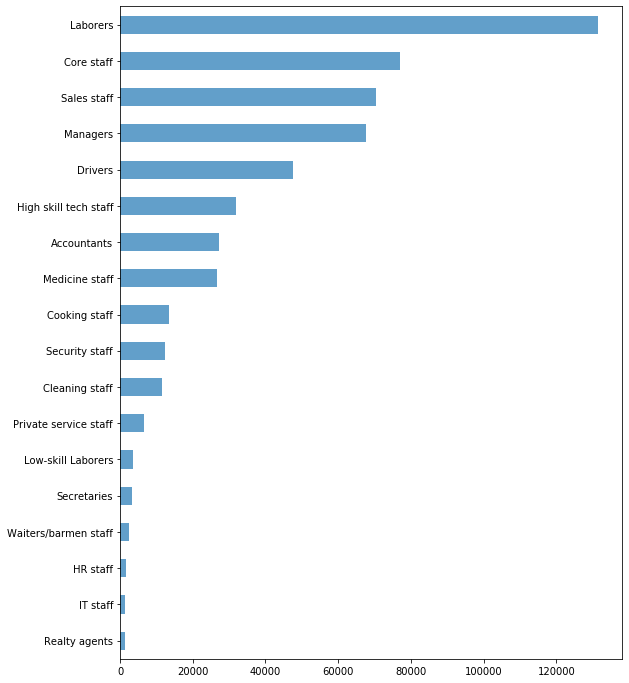

In [14]:
df['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind='barh', figsize=(9,12), alpha=0.7)

In [15]:
defaulter_codes= ['0','1','2','3','4','5']
# data labelling. 1 is a defaulter 0 is not
df['Label'] = np.where(df.STATUS.isin(defaulter_codes), 1, 0)
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,RISK,Label
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,0.0,C,no,0
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-1.0,C,no,0
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-2.0,C,no,0
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-3.0,C,no,0
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-4.0,C,yes,0
36,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-5.0,C,yes,0
37,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-6.0,C,yes,0
38,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-7.0,X,yes,0
39,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-8.0,0,yes,1
40,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,-9.0,0,yes,1


In [16]:
df.drop('STATUS', axis=1, inplace=True)
df['Label'].value_counts()

0    328352
1    209315
Name: Label, dtype: int64

In [17]:
len(df)

537667

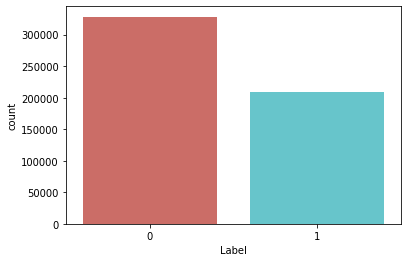

In [18]:
chart=sns.countplot(x='Label', data = df, palette = 'hls')

Text(0, 0.5, 'Number of Defaulters')

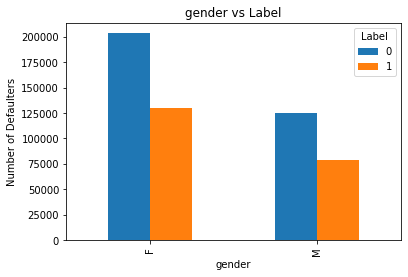

In [19]:
pd.crosstab(df.CODE_GENDER,df.Label).plot(kind='bar')
plt.title('gender vs Label')
plt.xlabel('gender')
plt.ylabel('Number of Defaulters')


Text(0, 0.5, 'Number of Defaulters')

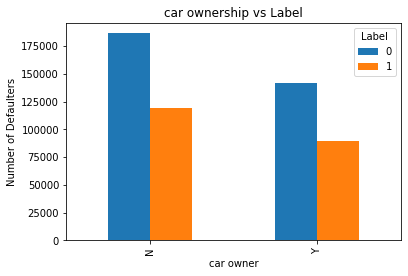

In [20]:
pd.crosstab(df.FLAG_OWN_CAR,df.Label).plot(kind='bar')
plt.title('car ownership vs Label')
plt.xlabel('car owner')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'Number of Defaulters')

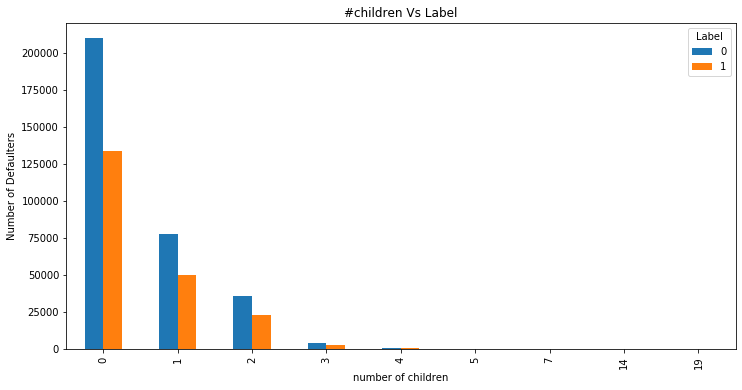

In [21]:
pd.crosstab(df.CNT_CHILDREN, df.Label).plot(kind='bar', figsize=(12,6))
plt.title('#children Vs Label')
plt.xlabel('number of children')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'number of defaulters')

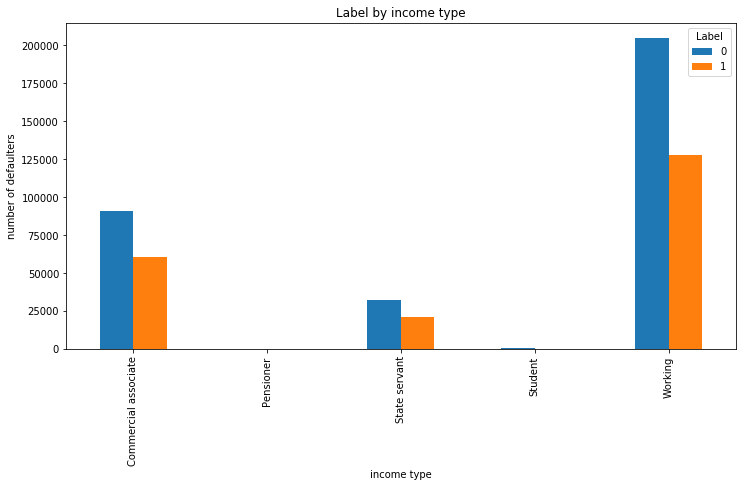

In [22]:
pd.crosstab(df.NAME_INCOME_TYPE, df.Label).plot(kind='bar', figsize=(12,6))
plt.title('Label by income type')
plt.xlabel('income type')
plt.ylabel('number of defaulters')

Text(0.5, 1.0, 'education type vs label')

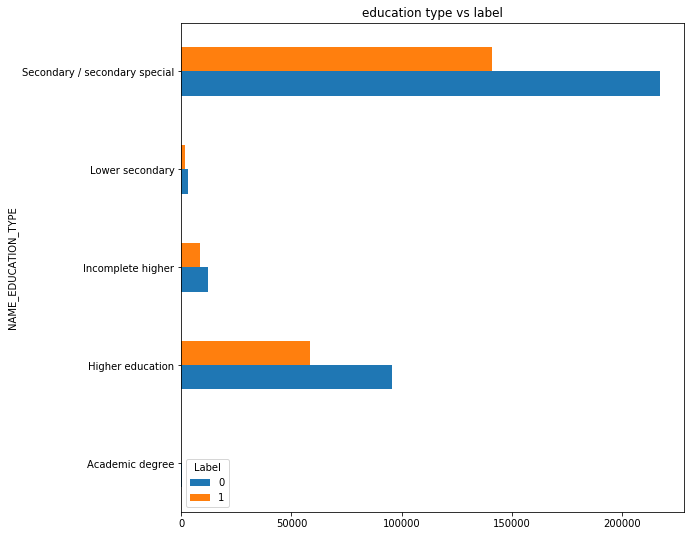

In [23]:
pd.crosstab(df.NAME_EDUCATION_TYPE, df.Label).plot(kind='barh', figsize=(9,9))
plt.title('education type vs label')

Text(0.5, 1.0, 'FAMILY_STATUS versus Label')

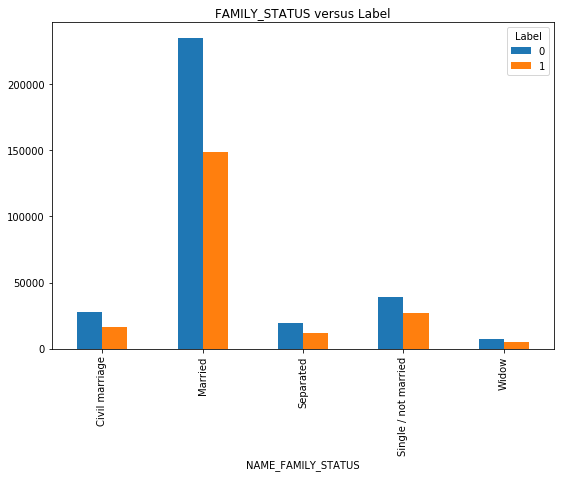

In [24]:
pd.crosstab(df.NAME_FAMILY_STATUS, df.Label).plot(kind='bar', figsize=(9,6))
plt.title('FAMILY_STATUS versus Label')

Text(0.5, 1.0, 'HOUSING_TYPE versus Label')

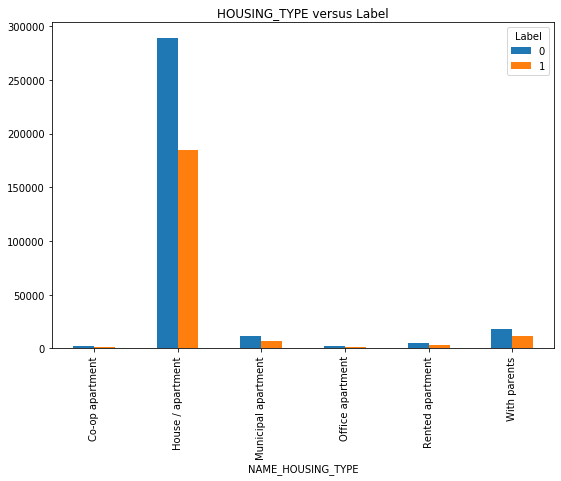

In [25]:
pd.crosstab(df.NAME_HOUSING_TYPE, df.Label).plot(kind='bar', figsize=(9,6))
plt.title('HOUSING_TYPE versus Label')

Text(0, 0.5, 'number of defaulters')

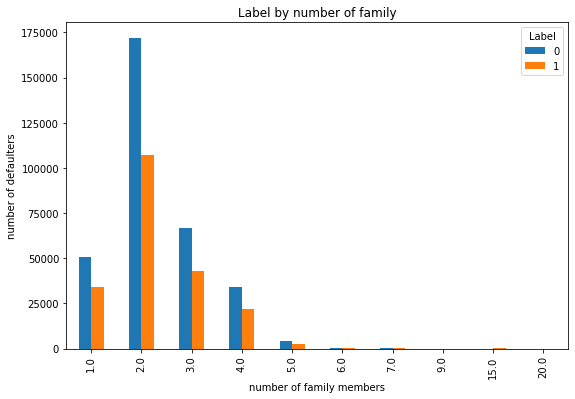

In [26]:
pd.crosstab(df.CNT_FAM_MEMBERS,df.Label).plot(kind='bar', figsize=(9,6))

plt.title('Label by number of family')
plt.xlabel('number of family members')
plt.ylabel('number of defaulters')

Text(0, 0.5, 'Number of Defaulters')

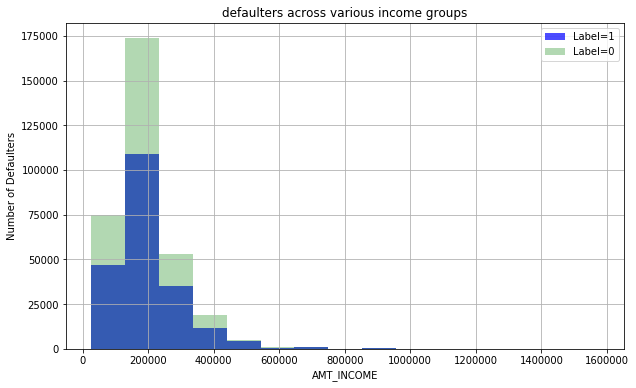

In [27]:
plt.figure(figsize=(10,6))
df[df['Label']==1]['AMT_INCOME_TOTAL'].hist(alpha=0.7,color='blue',
                                              bins=15,label='Label=1')
df[df['Label']==0]['AMT_INCOME_TOTAL'].hist(alpha=0.3,color='green',
                                                bins=15,label='Label=0')
                                                    
plt.title('defaulters across various income groups')                                                    
plt.legend()
plt.xlabel('AMT_INCOME')
plt.ylabel('Number of Defaulters')

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/parthxparab/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/parthxparab/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/parthxparab/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,Label
ID,1.000000,0.031586,-0.024915,0.029609,0.014325,nan,0.098981,0.014584,-0.072886,0.026159,0.004673,-0.011085
CNT_CHILDREN,0.031586,1.000000,-0.014309,0.277567,0.073164,nan,-0.016432,-0.029202,-0.013942,0.904351,-0.000430,0.003895
AMT_INCOME_TOTAL,-0.024915,-0.014309,1.000000,-0.047838,-0.009500,nan,-0.078836,0.007914,0.067699,-0.025477,-0.001829,0.018505
DAYS_BIRTH,0.029609,0.277567,-0.047838,1.000000,0.324231,nan,0.041483,-0.030423,0.055471,0.237472,0.051247,-0.007858
DAYS_EMPLOYED,0.014325,0.073164,-0.009500,0.324231,1.000000,nan,0.003695,-0.026980,0.041690,0.058954,0.044414,0.003912
FLAG_MOBIL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FLAG_WORK_PHONE,0.098981,-0.016432,-0.078836,0.041483,0.003695,nan,1.000000,0.372385,-0.069643,0.001964,-0.002339,-0.012290
FLAG_PHONE,0.014584,-0.029202,0.007914,-0.030423,-0.026980,nan,0.372385,1.000000,0.014056,-0.015966,-0.007564,0.000935
FLAG_EMAIL,-0.072886,-0.013942,0.067699,0.055471,0.041690,nan,-0.069643,0.014056,1.000000,-0.012525,0.005860,0.015066
CNT_FAM_MEMBERS,0.026159,0.904351,-0.025477,0.237472,0.058954,nan,0.001964,-0.015966,-0.012525,1.000000,-0.008847,-0.001249


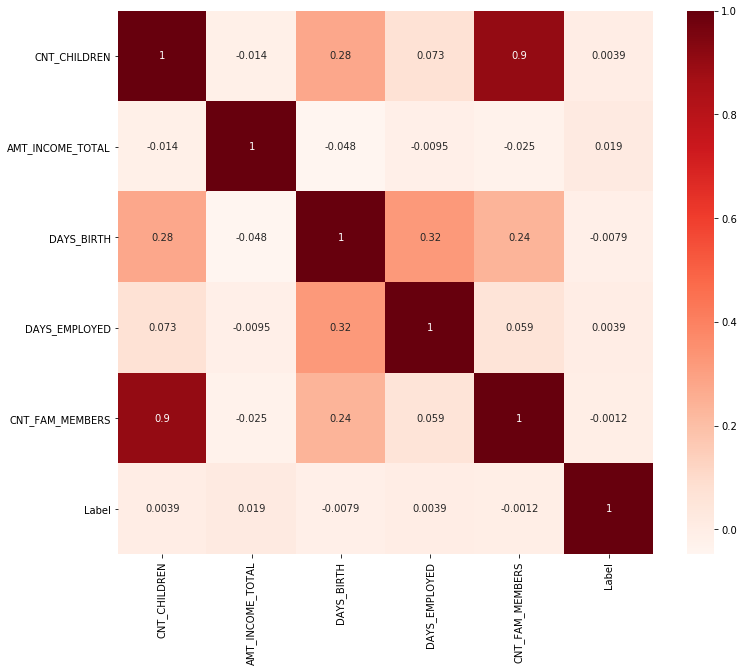

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

corr = df[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS','Label']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['CODE_GENDER']= label_encoder.fit_transform(df['CODE_GENDER']) 
df['FLAG_OWN_CAR']= label_encoder.fit_transform(df['FLAG_OWN_CAR']) 
df['FLAG_OWN_REALTY']= label_encoder.fit_transform(df['FLAG_OWN_REALTY']) 
df['NAME_INCOME_TYPE']= label_encoder.fit_transform(df['NAME_INCOME_TYPE']) 
df['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(df['NAME_EDUCATION_TYPE']) 
df['NAME_FAMILY_STATUS']= label_encoder.fit_transform(df['NAME_FAMILY_STATUS']) 
df['NAME_HOUSING_TYPE']= label_encoder.fit_transform(df['NAME_HOUSING_TYPE']) 
df['OCCUPATION_TYPE']= label_encoder.fit_transform(df['OCCUPATION_TYPE']) 
df['RISK']= label_encoder.fit_transform(df['RISK']) 

In [31]:
from sklearn.model_selection import train_test_split

# Features - exclude ID and Label columns
X = df.drop(columns=['ID', 'Label'])
# Label - select only label column
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=557)

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = lr.predict(X_test)

accuracy_score(y_pred, y_test)

0.6187252403890863

In [34]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
y_pred = rf.predict(X_test)

accuracy_score(y_pred, y_test)

0.6498595792958506

In [36]:
important_features = pd.Series(data=rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

MONTHS_BALANCE         0.428030
DAYS_BIRTH             0.117989
DAYS_EMPLOYED          0.112627
AMT_INCOME_TOTAL       0.078394
OCCUPATION_TYPE        0.044202
RISK                   0.034494
CNT_FAM_MEMBERS        0.022076
NAME_FAMILY_STATUS     0.021780
NAME_EDUCATION_TYPE    0.021732
NAME_INCOME_TYPE       0.018884
CNT_CHILDREN           0.017936
NAME_HOUSING_TYPE      0.016575
FLAG_OWN_CAR           0.011973
FLAG_PHONE             0.011481
FLAG_OWN_REALTY        0.011091
FLAG_EMAIL             0.010408
CODE_GENDER            0.010308
FLAG_WORK_PHONE        0.010020
FLAG_MOBIL             0.000000
dtype: float64

In [37]:
 creditxgb = XGBClassifier(
learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=50,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic'
)

In [38]:
creditxgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=50, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [39]:
y_pred = creditxgb.predict(X_test)

accuracy_score(y_pred, y_test)

0.6500176688303234

In [43]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
important_features = pd.Series(data=grid_search.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features